In [2]:
from pathlib import Path
import plotly.express as px
import plotly.graph_objects as go
from typing import Dict, List, Tuple

In [4]:
import sys
import os

app = "/app"
if app not in sys.path:
    sys.path.append(app)

In [12]:
from src.bipartite import EmbeddingComparator
from src.embed import Embedder
from src.biorxiv import Preprint
from src.review_process import ReviewProcess
from src.config import config

In [13]:
embedder = Embedder(model=config.embedding_model)

In [14]:
doi = "10.1101/2021.05.12.443743"

In [16]:
preprint = Preprint(doi=doi)

In [19]:
review_process = ReviewProcess(doi=doi)

In [24]:
preprint_paragraphs = preprint.get_section_paragraphs("results")

In [25]:
review_paragraphs = review_process.reviews[0].get_paragraphs()

In [27]:
comp = EmbeddingComparator(embedder)

In [37]:
similarity_matrix = comp.compare(preprint_paragraphs, review_paragraphs)

In [38]:
similarity_matrix.size()

torch.Size([22, 24])

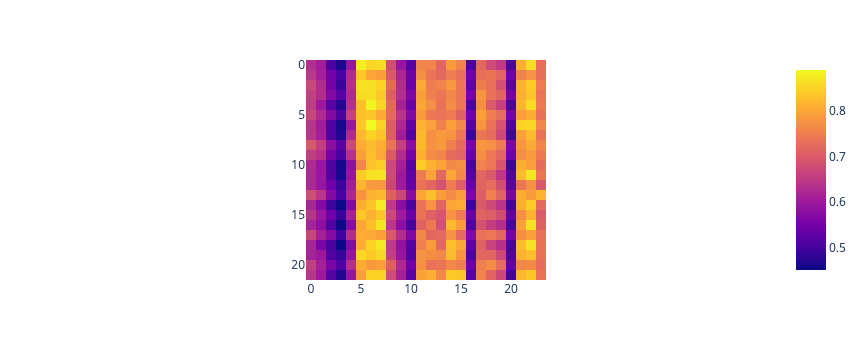

In [39]:
fig = px.imshow(
    similarity_matrix,
)
fig.show()

In [45]:
for i, p in enumerate(preprint_paragraphs):
    print(i, p[:80])

0 We designed an artificial codon-tag sequence to analyze the codon effects on mRN
1 (A) A scheme of the codon-tag reporter system. A codon to be tested (pink, in th
2 Having validated the codon-tag reporter system with the two Leu codons, we const
3 (A) Scheme of parallel analysis of codon effects (PACE). Codon tag reporter mRNA
4 Several lines of evidence indicated that PACE was a valid approach for the analy
5 (A) A scatter plot showing the reproducibility of the codon effects measured by 
6 Using CSC and tRNA sequencing, Bazzini et al. showed that nonoptimal codons tend
7 Next, we asked if the codon effects measured by PACE correlated with the ribosom
8 (A) Distribution of the ribosome footprint lengths derived from codon-tag sequen
9 (A) Scheme of ribosome footprint analysis using PACE reporter mRNAs. An example 
10 We first analyzed a correlation between the codon effects measured by PACE and t
11 Next, we modulated tRNA availability in zebrafish embryos to experimentally vali
12

In [44]:
for i, p in enumerate(review_paragraphs):
    print(i, p[:80])

0 **Note:** This preprint has been reviewed by subject experts for *Review Commons
1 Learn more at [Review Commons](https://reviewcommons.org)
2 -----
3 ### Referee \#1
4 #### Evidence, reproducibility and clarity
5  In this manuscript, Mishima et al., designed a reporter system (dubbed PACE, fo
6 Using the PACE reporter, the authors were able to obtain a quantitative estimati
7 
Having validated their PACE protocol, the authors performed ribosome profiling 
8 Overall, the manuscript is very well written and pleasant to read. The introduct
9 Below you will find some major and minor points that, in my opinion, should be a
10 **Major point:**
11 - One interesting aspect of the PACE reporter assay is the possibility to monito
12 Indeed, ribosome dwell times (in yeast and mammals) have been shown to respond b
13 If the authors performed RNA-seq together with the ribosome profiling experiment
14 - Figure 6: Insertion of the Lys x8 AAA stretch in the tandem ORF reporter leads
15 
On a simila